Hi CJ!!!!!!!!!!


Deck the Halls!!! Fa la la la la

I added this line.

In [1]:
%matplotlib notebook

from modsim import *

m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [99]:
#Taken from baseball problem, to insert own values

condition = Condition(x = 0 * m, 
                      y = 1 * m,
                      g = 9.8 * m/s**2,
                      mass = 3.4e-3 * kg,
                      diameter = .017* m,
                      rho = 1.2 * kg/m**3,
                      C_d = 0.5,
                      angle = 45 * degree,
                      velocity = 90 * m / s,
                      duration = 20 * s)
                    


def make_system(condition):
    """Make a system object.
    
    condition: Condition object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(condition)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    # compute timestamps
    ts = linspace(0, duration, 101)
    
    return System(init=init, g=g, mass=mass, 
                  area=area, rho=rho, C_d=C_d, ts=ts)

def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)
    
    a_grav = Vector(0, -g)

    v = Vector(vx, vy)
    
    f_drag = -rho * v.mag * v * C_d * area / 2
    a_drag = f_drag / mass
    
    a = a_grav + a_drag
    
    return vx, vy, a.x, a.y

def interpolate_range(results):
    """Computes the range of the ball when it lands.
    
    results: TimeFrame with x and y
    
    returns: distance in meters
    """
    xs = results.x
    ys = results.y
    t_end = ys.index[-1]
    
    if ys[t_end] > 0:
        msg = """The final value of y is still positive;
                 looks like the simulation didn't run
                 long enough."""
        raise ValueError(msg)
        
    t_peak = ys.argmax()
    descent = ys.loc[t_peak:]
    T = interp_inverse(descent, kind='cubic')
    
    t_land = T(0)
    X = interpolate(xs, kind='cubic')
    return X(t_land)

def range_func(angle, condition):  
    """Computes range for a given launch angle.
    
    angle: launch angle in degrees
    condition: Condition object
    
    returns: distance in meters
    """
    condition.set(angle=angle)
    system = make_system(condition)
    run_odeint(system, slope_func)
    x_range = interpolate_range(system.results)
    
    #print(angle)
    
    return x_range



def height_func(angle, distance, condition):
    """
    Takes a launch angle and a condition as parameters
    
    Simulates the flights of a ball, 
    
    Returns the height of the ball when it reaches a point
    
    """
    
    
    condition.set(angle=angle)
    system = make_system(condition)
    run_odeint(system, slope_func)
    
    T = interp_inverse(system.results.x)
    time_reached = T(distance)
    
    Y = interpolate(system.results.y)
    height = Y(time_reached)
    
    return height




'''
def error_func_low(angle, condition):
    height = height_func(angle, 60, condition)
    
    error = height-0
    return error

def error_func_high(angle, distance, condition):
    height = height_func(angle, distance, condition)
    
    error = height-6
    return error   
'''


def max_angle_hit_target(condition, angle_array, distance):
    
    h=height_func(0, distance, condition)
    a=0
    #print(h,a)
   
    for angle in angle_array:
        h = height_func(angle, distance, condition)
        #print(h,angle)
        if(h>=2):
            return a
        
        a = angle
        

def min_angle_hit_target(condition, angle_array, distance):
    
    h=height_func(0, distance, condition)
    a=0
    #print(h,a)
   
    for angle in angle_array:
        h = height_func(angle, distance, condition)
        #print(h,angle)
        a = angle
        if(h>=0):
            return a
        

In [74]:
angles_test = linspace(0,5,6)
angles1 = linspace(0,20,81)
angles2 = linspace(20.5,30,20)
angles3 = linspace(31,45,15)

array_length = len(angles1)+len(angles2)+len(angles3)

angles = [*angles1,*angles2,*angles3]


sweep_for_max_angle = SweepSeries()
sweep_for_min_angle = SweepSeries()
sweep_for_range = SweepSeries()


print(angles)

[0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0]


In [100]:
#min_angle_hit_target(condition, angles, 54)


condition = Condition(x = 0 , 
                      y = 1,
                      g = 9.8,
                      mass = 3.4e-3,
                      diameter = .017,
                      rho = 1.2,
                      C_d = 0.5,
                      angle = 45,
                      velocity = 90,
                      duration = 20)

In [104]:
#Sweep for range

for angle in angles:
    x_range = range_func(angle, condition)
    print(angle, x_range)
    sweep_for_range[angle] = x_range
    

0.0 31.49133863200775
0.25 32.84053317277955
0.5 34.15712617682372
0.75 37.34365865885996
1.0 38.98202362779206
1.25 40.61164962551058
1.5 42.29647326718923
1.75 44.18461311759643
2.0 46.53380957243048
2.25 51.70151957808501
2.5 48.89920451866793
2.75 50.41787937332653
3.0 51.92872087075549
3.25 53.40204434536275
3.5 54.81115390064638
3.75 56.111661080077354
4.0 57.22216583326735
4.25 57.949507690554945
4.5 26.48603130876488
4.75 60.733656892565996
5.0 61.82026569420398
5.25 62.86099673425355
5.5 63.86995156420183
5.75 64.8535458293896
6.0 65.81944170330738
6.25 66.77937101347933
6.5 67.74521136256521
6.75 68.73929553551031
7.0 70.05610007559217
7.25 70.2991058594471
7.5 71.11473158296138
7.75 71.90926341132207
8.0 72.68190578376804
8.25 73.43208746928221
8.5 74.15933205240536
8.75 74.8634133445621
9.0 75.54517221984436
9.25 76.2071454043705
9.5 76.84976009904159
9.75 77.4717869397042
10.0 78.06182016805744
10.25 78.7309744525881
10.5 79.31915773672476
10.75 79.89297400639008
11.0 80.4

In [105]:
#Sweep for max angle that hits

max_array = []
min_array = []

distances1 = linspace(0,20,21)
distances2 = linspace(21,100,16)
distances = [*distances1,*distances2]

for distance in distances: #angle in angles
    
    #x_range = sweep_for_range[angle]
    
    max_angle = max_angle_hit_target(condition, angles, distance)
    min_angle = min_angle_hit_target(condition, angles, distance)
    
    
    print(distance, max_angle, min_angle)
    
    max_array.append(max_angle)
    min_array.append(min_angle)
    
    #print(max_array, min_array)
    
    #print(x_range, min_angle)
    #sweep_for_max_angle[x_range] = max_angle
    #sweep_for_min_angle[x_range] = m_angle

0.0 None 0.0
1.0 None 0.0
2.0 27.0 0.0
3.0 19.0 0.0
4.0 14.5 0.0
5.0 11.75 0.0
6.0 10.0 0.0
7.0 8.75 0.0
8.0 7.75 0.0
9.0 6.75 0.0
10.0 6.25 0.0
11.0 5.75 0.0
12.0 5.25 0.0
13.0 5.0 0.0
14.0 4.5 0.0
15.0 4.25 0.0
16.0 4.25 0.0
17.0 4.0 0.0
18.0 4.0 0.0
19.0 4.0 0.0
20.0 3.75 0.0
21.0 3.75 0.0
26.2666666667 3.5 0.0
31.5333333333 3.5 0.25
36.8 3.75 0.75
42.0666666667 4.0 1.5
47.3333333333 4.5 2.5
52.6 5.25 3.25
57.8666666667 6.0 4.25
63.1333333333 7.0 5.5
68.4 8.25 6.75
73.6666666667 10.0 8.5
78.9333333333 11.75 10.5
84.2 14.25 13.0
89.4666666667 17.75 16.25
94.7333333333 23.5 21.5
100.0 None None


<IPython.core.display.Javascript object>


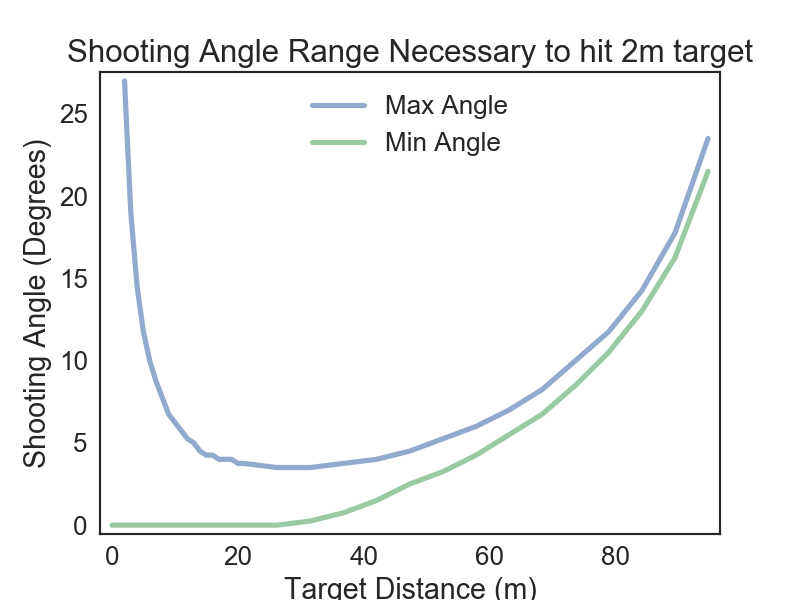

Saving figure to file 2mTargetGraph.pdf


In [107]:
newfig()
plot(distances, max_array, label='Max Angle')
plot(distances, min_array, label='Min Angle')
decorate(xlabel ='Target Distance (m)',
         ylabel='Shooting Angle (Degrees)',
         title = 'Shooting Angle Range Necessary to hit 2m target')
savefig('2mTargetGraph.pdf')

' \n\nJUNK CODE\n\nplot(sweep_for_range.values, sweep_for_range.index)\n#sweep_for_range[0]\n#print(max_angle_hit_target(condition, angles, 50))\n#print(height_func(45, condition, 50))\n\n#Sweep for min angle that hits\nfor x in sweep_for_range.index:\n    min_angle = min_angle_hit_target(condition, angles, x)\n    sweep_for_min_angle[angle] = min_angle\n\nsystem = make_system(condition)\n\nslope_func(system.init, 0, system)\n\nrun_odeint(system, slope_func)\n\ninterpolate_range(system.results)\n'

In [ ]:
''' 

JUNK CODE

plot(sweep_for_range.values, sweep_for_range.index)
#sweep_for_range[0]
#print(max_angle_hit_target(condition, angles, 50))
#print(height_func(45, condition, 50))

#Sweep for min angle that hits
for x in sweep_for_range.index:
    min_angle = min_angle_hit_target(condition, angles, x)
    sweep_for_min_angle[angle] = min_angle

system = make_system(condition)

slope_func(system.init, 0, system)

run_odeint(system, slope_func)

interpolate_range(system.results)
''' 